In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from skimage.segmentation import (morphological_chan_vese,
                                  checkerboard_level_set)
%matplotlib inline

### load image

In [2]:
#img_path = "/Users/yw18581/Documents/UoB_MAPS_Documents/Notebooks_pro/File_1.tiff"
f_no=71
img_path ="/Users/cdesio/UoB/Jordan/10x10_25mm_8bit_copy/File_{}.tiff".format(f_no)
image = imread(img_path)

### calculate contour using scikit-image `morphological_chan_vese`

In [44]:
def calculate_profile(image):
    # Initial level set
    init_ls =  checkerboard_level_set(image.shape, 5)
    # List with intermediate results for plotting the evolution

    ls = morphological_chan_vese(image, 10, init_level_set=init_ls, smoothing=6)
    return ls

In [45]:
ls= calculate_profile(image)

In [46]:
def show_img_cont(image,ls):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(image, cmap="gray")
    ax.set_axis_off()
    ax.contour(ls,[0.5], colors='r')
    #ax.set_title("Morphological ACWE segmentation", fontsize=12)
    plt.show()
    return
#plt.savefig("try.tiff")#,figsize=(2400/96, 2800/96), dpi=96)



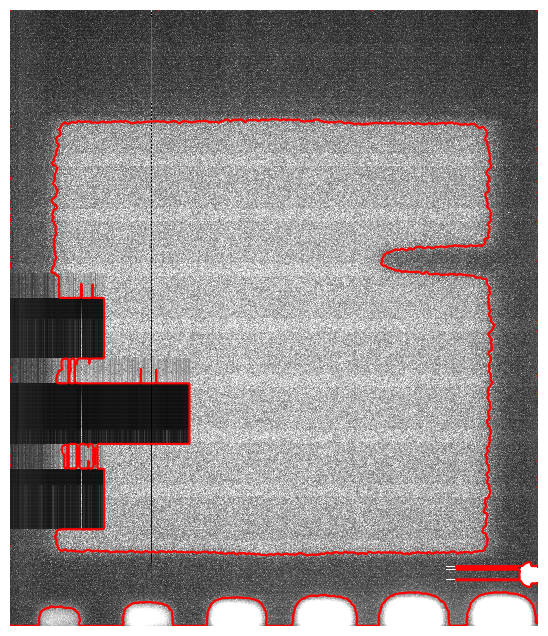

In [47]:
show_img_cont(image, ls)

In [10]:
def select_profile(array):
    sel=[]
    for i in range(np.max(np.argwhere(array)[:,0])):
        sel.append([i,np.max(np.argwhere(array)[:,1][np.argwhere(array)[:,0]==i])])
        #print(i,np.max(np.argwhere(array)[:,1][np.argwhere(array)[:,0]==i]))
    sel = np.asarray(sel)
    return sel

In [59]:
def select_profile_2(array):
    arr = np.argwhere(array)
    y = arr[:,0]
    X = arr[:,1]
    y_uniques = np.unique(y)
    y_out = [np.max(X[y==yi]) for yi in y_uniques]
    return y_uniques, y_out

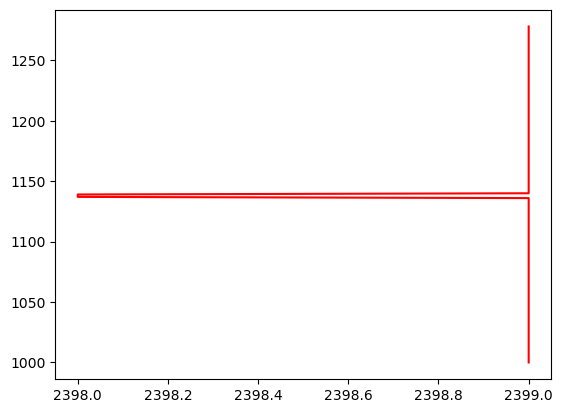

In [60]:
import matplotlib 
matplotlib.rcdefaults() 
leaf = select_profile(ls[1000:1280])
plt.plot(leaf[:,1], leaf[:,0]+1000,c='r')

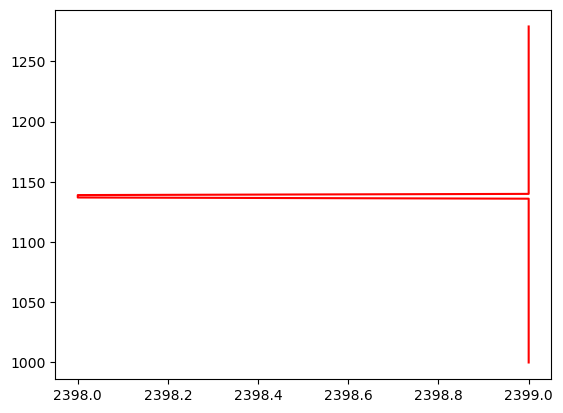

In [62]:
import matplotlib 
matplotlib.rcdefaults() 
y,x = select_profile_2(ls[1000:1280])
plt.plot(x, np.asarray(y)+1000,c='r')

In [38]:
leaf_position = np.min(leaf[:,1])
print(leaf_position)

1689


In [51]:
ls_inv=(~ls.astype(bool)).astype(int)

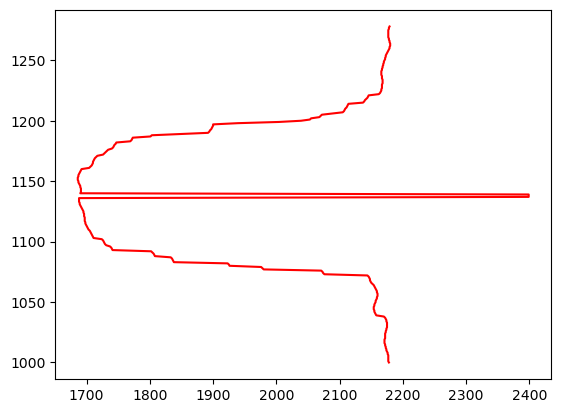

In [52]:
leaf = select_profile(ls_inv[1000:1280])
plt.plot(leaf[:,1], leaf[:,0]+1000,c='r')

In [23]:
leaf_position = np.min(leaf[:,1])

In [24]:
print(leaf_position)

1689


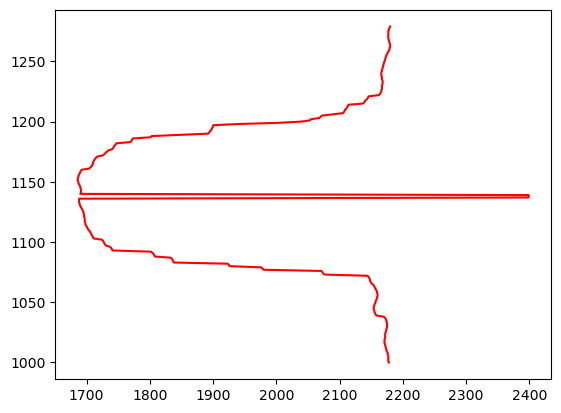

In [55]:
matplotlib.rcdefaults() 
x,y = select_profile_2(ls_inv[1000:1280])
plt.plot( np.asarray(y), x+1000,c='r')

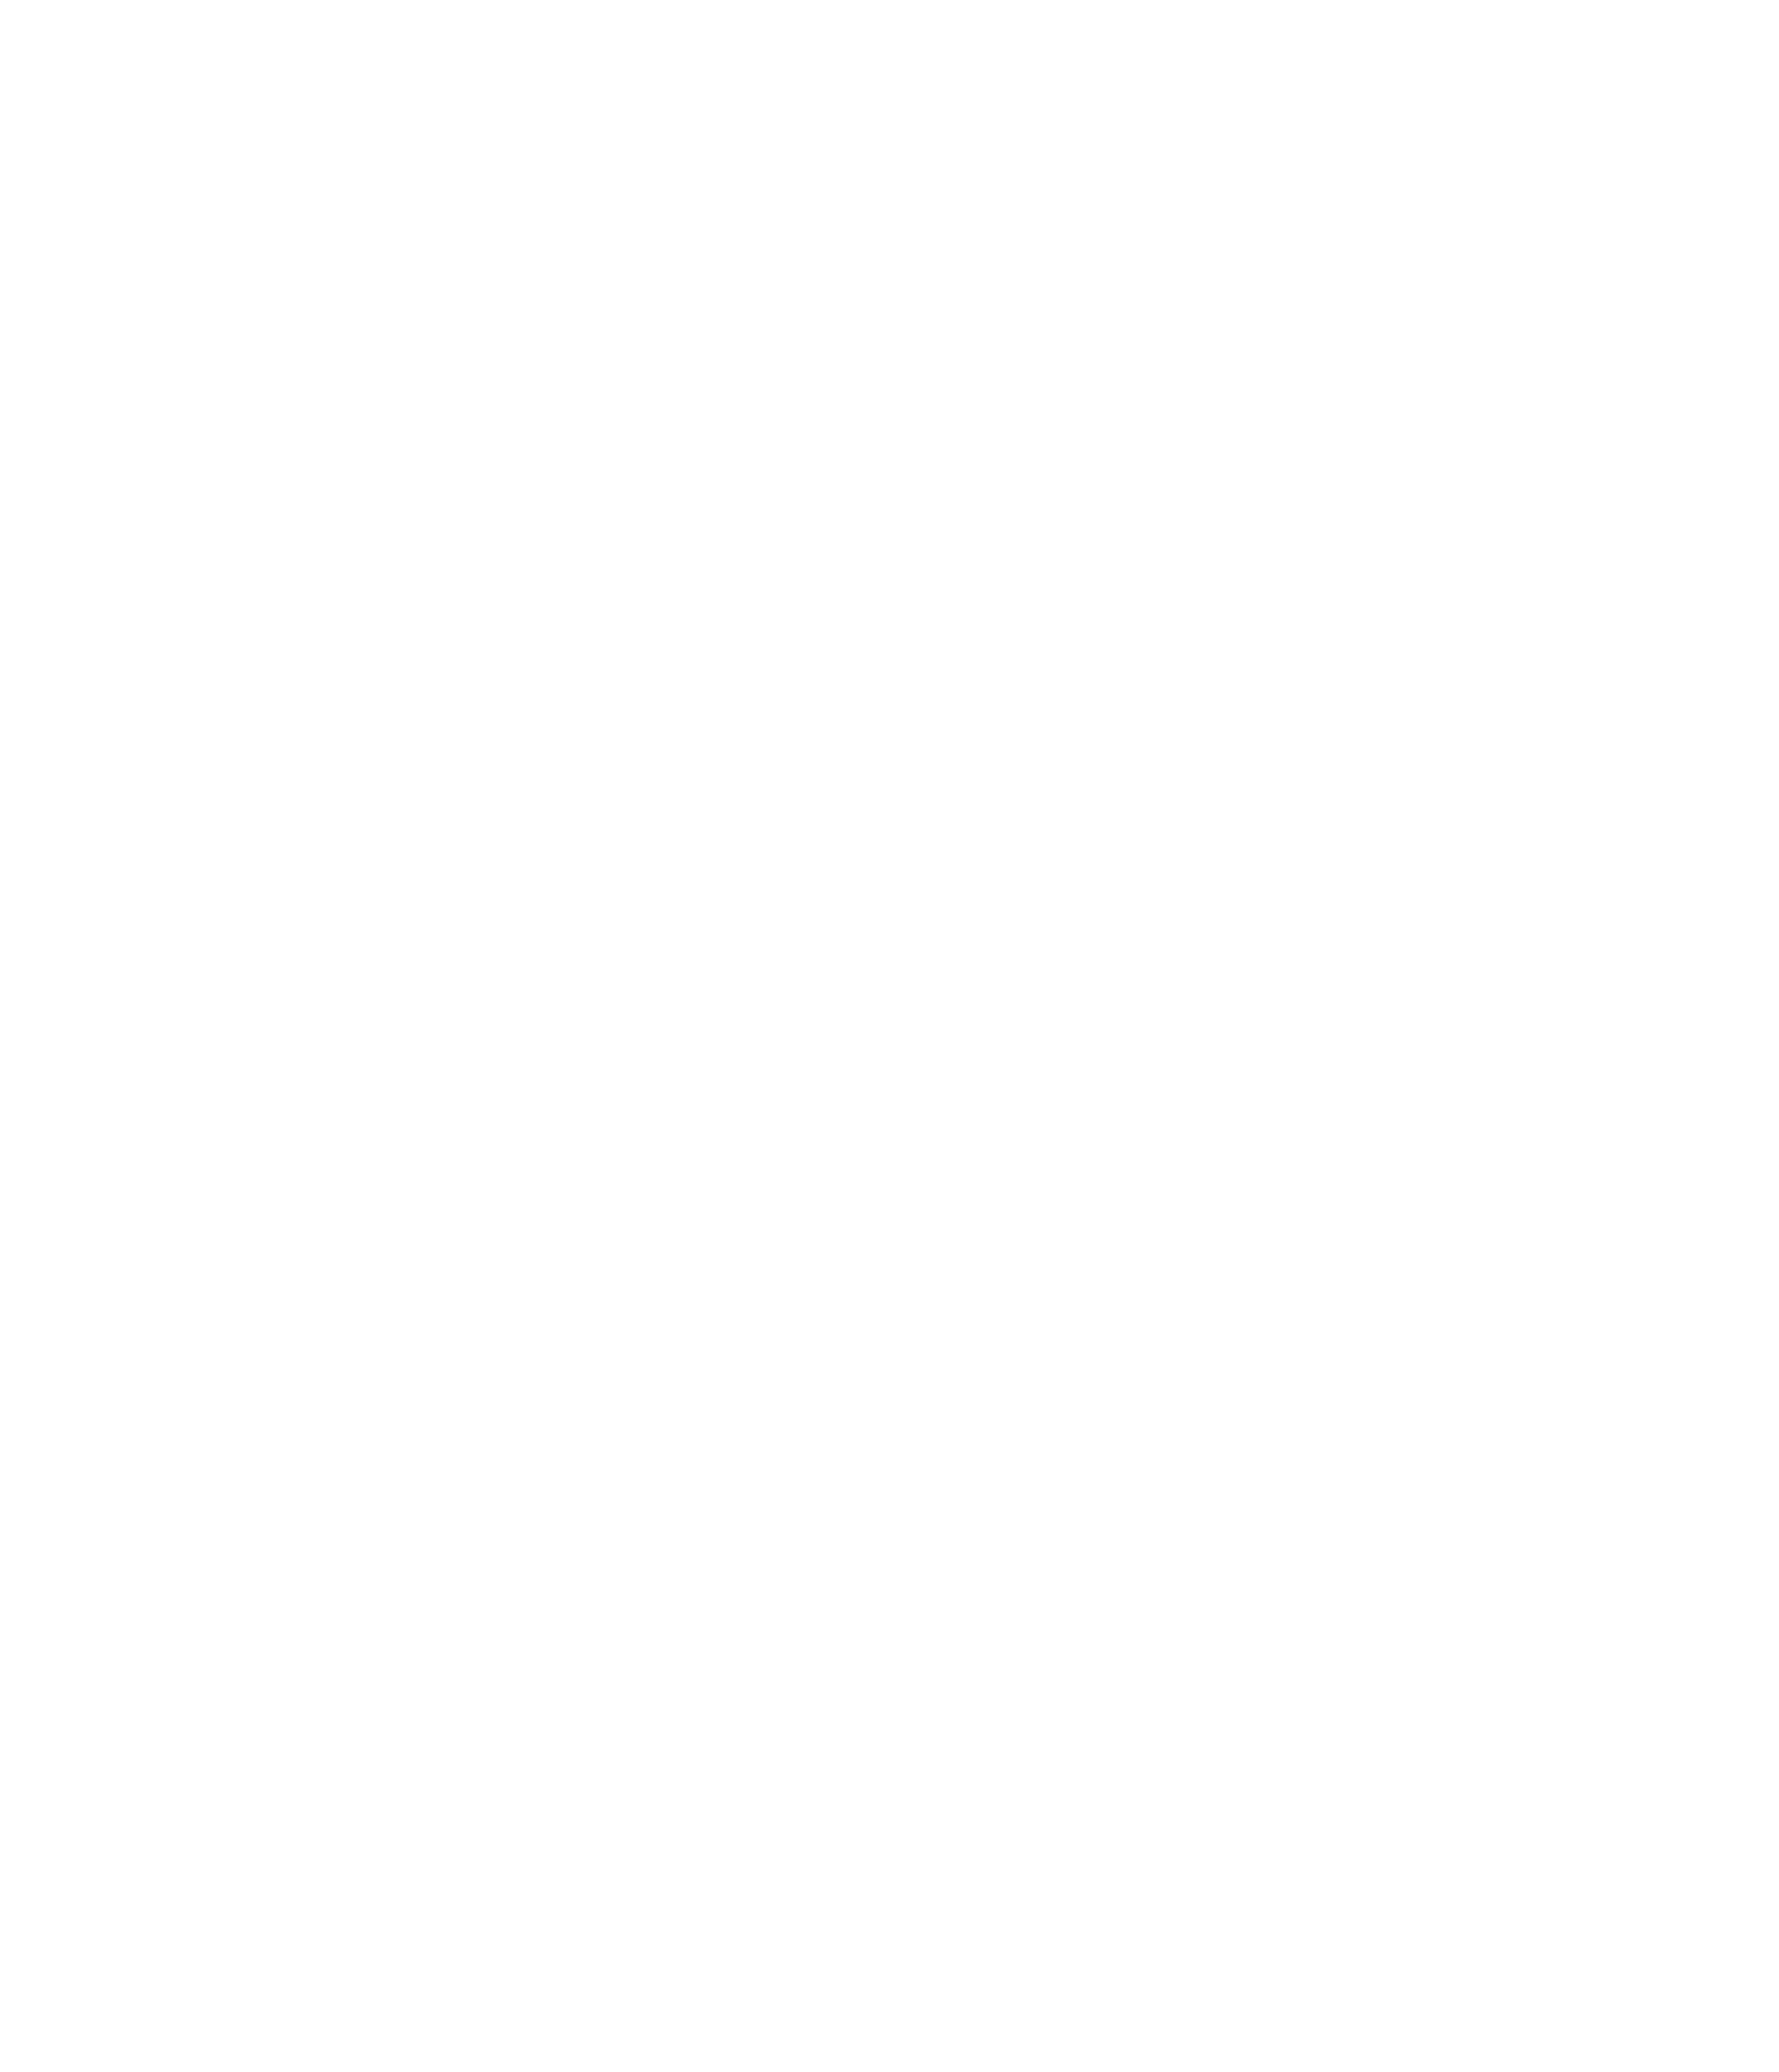

In [189]:
plt.figure(figsize=(2400/96, 2800/96), dpi=96)
plt.style.use('dark_background')
plt.axes([0,0,1,1], frameon=False)
plt.plot(leaf[:,1], leaf[:,0]+1000, c='w', alpha=1)
plt.fill_betweenx(leaf[:,0]+1000, leaf[:,1],x2=2205,color='w',alpha=1)
fig = plt.imshow(image, cmap="gray", alpha=0)
plt.ylim(2800,0)
plt.xlim(0,2400)
plt.box(False)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
#plt.savefig("mask_only.tiff")
plt.savefig("/Users/cdesio/UoB/Jordan/10x10_25mm_v1/File_{}_25mm_mask_{}.tiff".format(f_no,leaf_position))

In [ ]:
def select_profile(array):
    sel=[]
    for i in range(np.max(np.argwhere(array)[:,0])):
        sel.append([i,np.max(np.argwhere(array)[:,1][np.argwhere(array)[:,0]==i])])
        #print(i,np.max(np.argwhere(array)[:,1][np.argwhere(array)[:,0]==i]))
    sel = np.asarray(sel)
    return sel

In [57]:
ls_inv[1000:1280]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [58]:
np.argwhere(ls_inv[1000:1280])[:,0]

array([  0,   0,   0, ..., 279, 279, 279])

In [61]:
np.max(np.argwhere(ls_inv[1000:1280])[:,1][np.argwhere(ls_inv[1000:1280])[:,0]==0])

2176

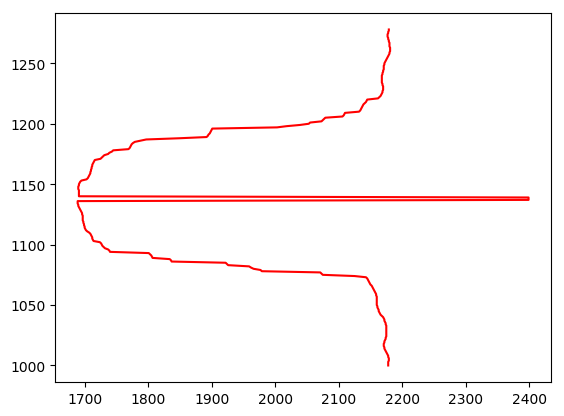

In [63]:
leaf = select_profile(ls_inv[1000:1280])
plt.plot(leaf[:,1], leaf[:,0]+1000,c='r')

In [64]:
new_leaf = leaf

In [70]:
for i, (j, k) in enumerate(new_leaf):
    if i >3 and i < len(new_leaf)-3: 
        if np.abs(k-new_leaf[i-1][1])>150:
            new_leaf[i][1]=np.mean([new_leaf[i-3][1], new_leaf[i+3][1]])

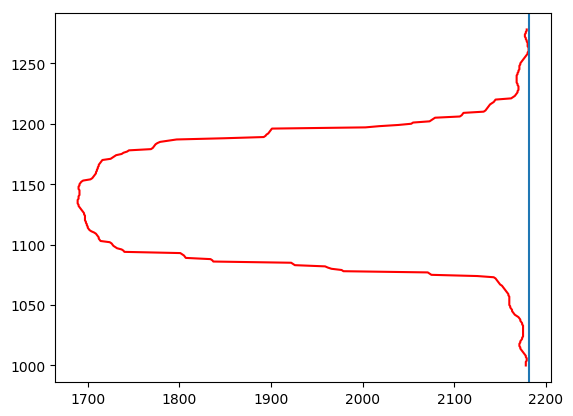

In [71]:
plt.plot(leaf[:,1], leaf[:,0]+1000,c='r')
plt.axvline(x=np.max(leaf[:,1]))

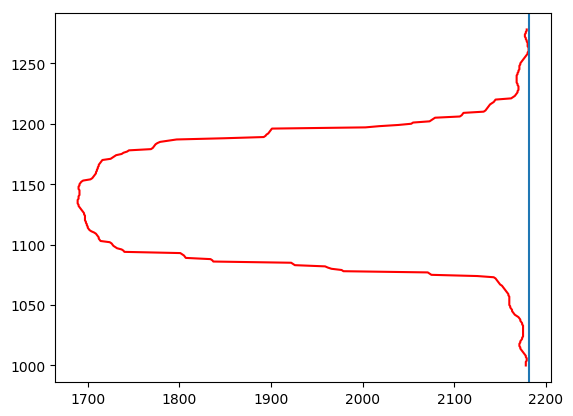

In [72]:
plt.plot(new_leaf[:,1], new_leaf[:,0]+1000,c='r')
plt.axvline(x=np.max(new_leaf[:,1]))

In [18]:
np.max(leaf[:,1])

2181

In [ ]:
plt.axvline(x=np.max(leaf[:,1]))

In [280]:
f_no = 186

In [281]:
img_path ="/Users/cdesio/UoB/Jordan/10x10_25mm_8bit/File_{}.tiff".format(f_no)

In [282]:
image = imread(img_path)

In [283]:
ls= calculate_profile(image)

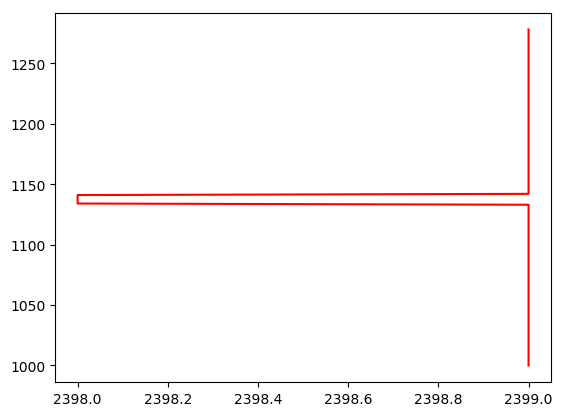

In [284]:
matplotlib.rcdefaults() 
leaf = select_profile(ls[1000:1280])
plt.plot(leaf[:,1], leaf[:,0]+1000,c='r')

In [285]:
ls_inv=(~ls.astype(bool)).astype(int)

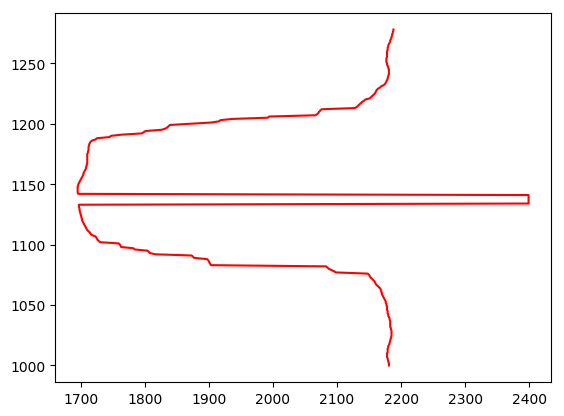

In [286]:
leaf = select_profile(ls_inv[1000:1280])
plt.plot(leaf[:,1], leaf[:,0]+1000,c='r')

In [287]:
new_leaf = leaf

In [288]:
index = []
for i, (j, k) in enumerate(new_leaf):
    if i< len(new_leaf)-1:
        if np.abs(k-new_leaf[i+1][1])>180 or np.abs(k-new_leaf[i+1][1])==0 :
            if new_leaf[i][1]>= new_leaf[i+1][1]:
                index.append(i)
            elif new_leaf[i+1][1]> new_leaf[i][1]:
                index.append(i+1)

In [291]:
index

[0,
 1,
 3,
 5,
 7,
 8,
 9,
 11,
 12,
 13,
 15,
 18,
 20,
 22,
 24,
 25,
 26,
 27,
 28,
 30,
 32,
 33,
 34,
 35,
 36,
 38,
 41,
 43,
 44,
 46,
 47,
 48,
 50,
 52,
 59,
 61,
 120,
 122,
 124,
 126,
 128,
 129,
 131,
 132,
 134,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 145,
 146,
 147,
 149,
 158,
 163,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 176,
 178,
 179,
 180,
 182,
 237,
 239,
 241,
 242,
 243,
 244,
 246,
 249,
 251,
 252,
 253,
 255,
 256,
 257,
 258,
 259,
 261,
 262,
 264,
 268,
 271,
 273,
 275,
 277]

In [289]:
leaf = np.delete(new_leaf, index, axis=0)

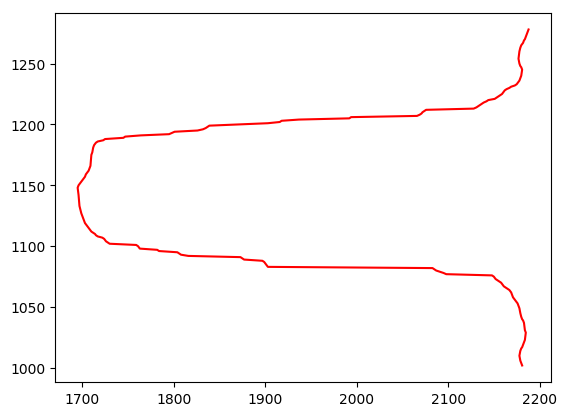

In [290]:
plt.plot(leaf[:,1], leaf[:,0]+1000,c='r')

2399 2399
2175 1003
2399 1051
2147 1054
2399 1076
2066 1079


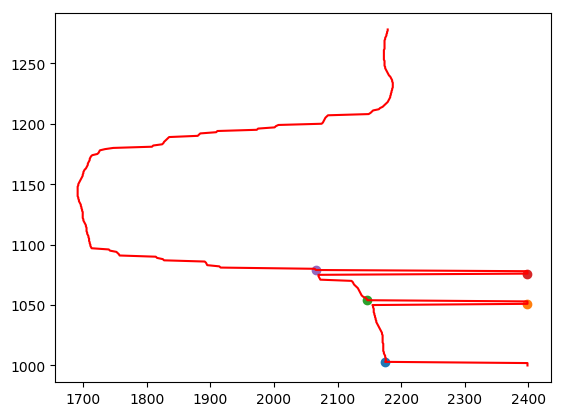

In [165]:
for i, (j, k) in enumerate(new_leaf):
    if i==0:
        print(new_leaf[i][1], new_leaf[i+1][1])
        if np.abs(k-new_leaf[i+1][1])>200:
            new_leaf[i][1]==new_leaf[i+1][1]
    else:
        if np.abs(k-new_leaf[i-1][1])>200:
            #print(k, new_leaf[i-5][1], new_leaf[i-4][1], new_leaf[i-3][1], new_leaf[i-2][1], new_leaf[i-1][1], new_leaf[i][1],
            #     new_leaf[i+1][1], new_leaf[i+2][1], new_leaf[i+3][1], new_leaf[i+4][1], new_leaf[i+5][1])
            #new_leaf[i][1]=np.mean(new_leaf[i-3][1], new_leaf[i+3][1]) 
            print(k,j+1000)
             plt.scatter(k,j+1000)
plt.plot(new_leaf[:,1], new_leaf[:,0]+1000,c='r')

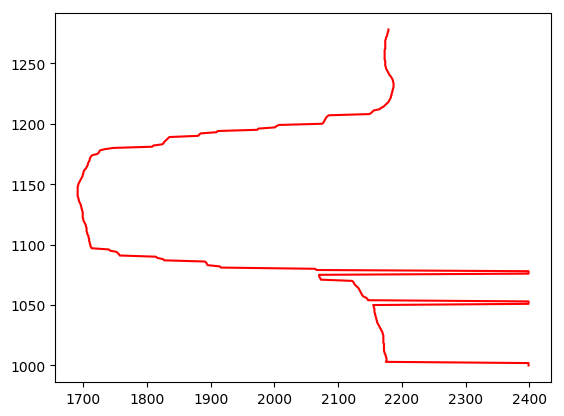

In [142]:
plt.plot(new_leaf[:,1], new_leaf[:,0]+1000,c='r')

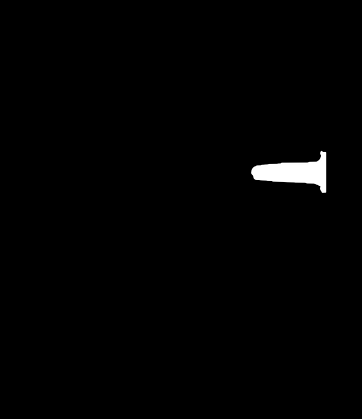

In [293]:
#plt.figure(figsize=(2400/96, 2800/96), dpi=96)
plt.figure(figsize=(5,4))
plt.style.use('dark_background')
plt.axes([0,0,1,1], frameon=False)
plt.plot(leaf[:,1], leaf[:,0]+1000, c='w', alpha=1)
plt.fill_betweenx(leaf[:,0]+1000, leaf[:,1],x2=2205,color='w',alpha=1)
fig = plt.imshow(image, cmap="gray", alpha=0)
plt.ylim(2800,0)
plt.xlim(0,2400)
plt.box(False)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)